In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt ###For visualizations

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
####Reading the dataset######
leads =pd.read_csv("Leads.csv")

In [4]:
# Look at the first few entries

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Inspect the shape of the dataset

leads.shape

In [ ]:
# Inspect the different columsn in the dataset

leads.columns

In [ ]:
leads.describe()

In [ ]:
leads.info()

Cleaning the data 

In [ ]:
leads.isnull().sum()

We see a lot many columns with high number of missing values. Let us eliminate columns with more than 30% or 3000 missing values.

In [ ]:
for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [ ]:
leads.isnull().sum()

Let us drop variables that wouldn't be required for the particular analysis.

In [ ]:
leads.drop(['City'], axis = 1, inplace = True)
leads.drop(['Country'], axis = 1, inplace = True)

In [5]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)###Find out the missing values as a percentage 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(leads[column].astype('category').value_counts().index.values,leads[column].astype('category').value_counts().values)
#     plt.show()

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

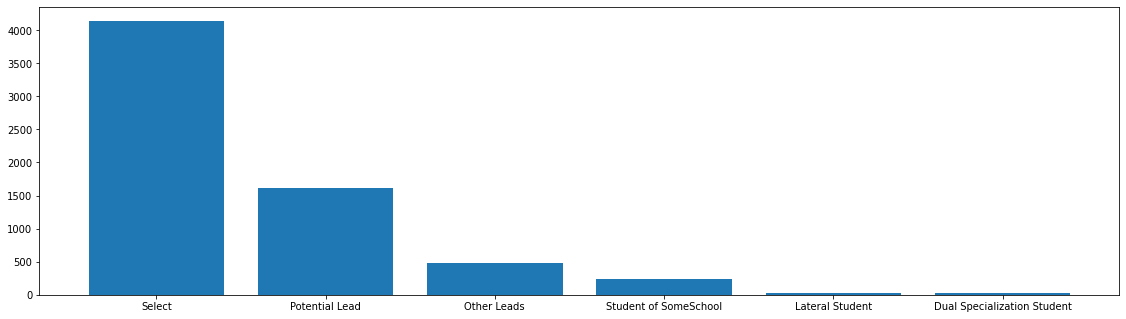

In [8]:
leads['Lead Profile'].astype('category').value_counts()
fig = plt.figure(figsize=(15,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(leads['Lead Profile'].astype('category').value_counts().index.values,leads['Lead Profile'].astype('category').value_counts().values)
plt.show()

In [ ]:
leads['How did you hear about X Education'].value_counts()

In [ ]:
leads['Specialization'].value_counts()

In [ ]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [ ]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [ ]:
leads['What matters most to you in choosing a course'].value_counts()

In [ ]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [ ]:
leads.isnull().sum()

Drop the null rows for the column What is you current occupation.

In [ ]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [ ]:
leads.isnull().sum()

In [ ]:
leads = leads[~pd.isnull(leads['Specialization'])]
leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~pd.isnull(leads['Last Activity'])]

In [ ]:
leads.isnull().sum()

In [ ]:
leads.shape

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imp.fit(leads[['TotalVisits','Page Views Per Visit']])
transformed_data=imp.fit_transform(leads[['TotalVisits','Page Views Per Visit']])
transformed_data=pd.DataFrame(transformed_data,columns=['TotalVisits','Page Views Per Visit'])

In [ ]:
leads.reset_index(inplace=True,drop=True)

In [ ]:
#leads['TotalVisits]
leads['TotalVisits']=transformed_data['TotalVisits']
leads['Page Views Per Visit']=transformed_data['Page Views Per Visit']

In [ ]:
leads.isnull().sum()

In [ ]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
leads.describe()

In [ ]:
import seaborn as sns
ax = sns.boxplot(data=leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']], orient="h", palette="Set2")

In [ ]:
leads['Total Time Spent on Website'].hist();

In [ ]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

In [ ]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [ ]:
dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [ ]:
leads.head()

Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = leads.drop(['Converted'], 1)
X.head()

In [ ]:
y = leads['Converted']

y.head()

In [ ]:
y.value_counts(normalize=True)

In [ ]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

Correlation Analysis

In [ ]:
leads.corr()

In [ ]:
ax = sns.heatmap(leads[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']].corr())

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier(max_depth=7, n_estimators=300, learning_rate=0.3,
                            n_jobs=-1, verbosity=1, gpu_id=-1,subsample=1, colsample_bytree=1,min_child_weight=1,
                           objective="binary:logistic",eval_metric=['error','auc'] )

In [ ]:
xgb_clf

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [ ]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

In [ ]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
###Feature selection using variable importance#######
from xgboost import plot_importance
var_imp_data=pd.DataFrame({'feature_names':xgb_clf.feature_names_in_,'feature_importances':xgb_clf.feature_importances_})
var_imp_data.sort_values('feature_importances',ascending=False,inplace=True)

In [ ]:
var_imp_data[var_imp_data.feature_importances>0]

In [ ]:
reduced_feature_space=var_imp_data.feature_names.values

In [ ]:
X_train_1=X_train[reduced_feature_space]
X_test_1=X_test[reduced_feature_space]

In [ ]:
xgb_clf1 = xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.2,
                            n_jobs=-1, verbosity=1, gpu_id=-1,subsample=1, colsample_bytree=1,min_child_weight=1,
                           objective="binary:logistic",eval_metric=['error','auc'] )

In [ ]:
xgb_clf1.fit(X_train_1, y_train)

In [ ]:
print_score(xgb_clf1, X_train_1, y_train, X_test_1, y_test, train=True)

In [ ]:
print_score(xgb_clf1, X_train_1, y_train, X_test_1, y_test, train=False)

In [ ]:
###Grid Search#####
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
pipeline_xgb = Pipeline([('xgb', xgb.XGBClassifier(max_depth=4, n_estimators=300, learning_rate=0.2,
                            n_jobs=-1, verbosity=1, gpu_id=-1,subsample=1, colsample_bytree=1,min_child_weight=1,
                           objective="binary:logistic",eval_metric=['error','auc'] ))])


In [ ]:
params_xgb = {'xgb__max_depth':(4,7),
               'xgb__n_estimators':(300,1000),
               'xgb__learning_rate':(0.2, 0.3)} 

In [ ]:
xgb_grid_pipeline = GridSearchCV(pipeline_xgb,
                                 params_xgb,
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=1,
                                 scoring='accuracy')

In [ ]:
xgb_grid_pipeline.fit(X_train_1,y_train) 

In [ ]:
xgb_grid_pipeline.best_score_

In [ ]:
best = xgb_grid_pipeline.best_estimator_.get_params() 

In [ ]:
best

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def print_score1(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

#         res = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
#         print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
#         print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [ ]:
print_score1(xgb_grid_pipeline, X_train_1, y_train, X_test_1, y_test, train=True)

In [ ]:
print_score1(xgb_grid_pipeline, X_train_1, y_train, X_test_1, y_test, train=False)